<a href="https://colab.research.google.com/github/Fredrick219/Britedataa/blob/main/2_Food_Hygiene_Rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/food_hygiene_rating_data.csv')

In [74]:
df.head()

,Unnamed: 0,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,PostCode,RatingValue,RatingKey,RatingDate,LocalAuthorityCode,LocalAuthorityName,Longitude,Latitude
0,0,1438654,21/00856/FOOD,1st Base Catering,Mobile caterer,E20 2ST,AwaitingInspection,fhrs_awaitinginspection_en-GB,NaN,525,Newham,-0.018066,51.538799
1,1,1132140,19/00459/FOOD,53.5 Degrees,Restaurant/Cafe/Canteen,E16 2RD,5,fhrs_5_en-GB,2019-05-10,525,Newham,0.064757,51.507405
2,2,1132134,19/00447/FOOD,53.5 Degrees,Restaurant/Cafe/Canteen,E15 4LZ,5,fhrs_5_en-GB,2019-05-14,525,Newham,0.009809,51.543395
3,3,1260384,20/00288/FOOD,55 Square Limited,Restaurant/Cafe/Canteen,E16 1EN,2,fhrs_2_en-GB,2020-12-09,525,Newham,0.012417,51.517514
4,4,1389145,21/00354/FOOD,7 Mamas Ltd,Takeaway/sandwich shop,E6 3HN,5,fhrs_5_en-GB,2022-01-05,525,Newham,0.055372,51.527803


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24352 entries, 0 to 24351
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                24352 non-null  int64  
 1   FHRSID                    24352 non-null  int64  
 2   LocalAuthorityBusinessID  24352 non-null  object 
 3   BusinessName              24351 non-null  object 
 4   BusinessType              24352 non-null  object 
 5   PostCode                  24352 non-null  object 
 6   RatingValue               24352 non-null  object 
 7   RatingKey                 24352 non-null  object 
 8   RatingDate                21901 non-null  object 
 9   LocalAuthorityCode        24352 non-null  int64  
 10  LocalAuthorityName        24352 non-null  object 
 11  Longitude                 24352 non-null  float64
 12  Latitude                  24352 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 2.4+ MB


In [76]:


rows_with_nan = df[df.isna().any(axis=1)]

# Display the rows with NaN values
print(rows_with_nan)

       Unnamed: 0   FHRSID LocalAuthorityBusinessID  \
0               0  1438654            21/00856/FOOD   
22             22  1471237            22/00628/FOOD   
23             23  1471238            22/00629/FOOD   
29             29  1414858            21/00653/FOOD   
32             32  1453329            22/00050/FOOD   
...           ...      ...                      ...   
24299        1026  1245188                    75310   
24302        1029  1351467                    77024   
24304        1031  1375241                    77322   
24311        1038  1359674                    77094   
24323        1050  1245135                    71977   

                                   BusinessName             BusinessType  \
0                             1st Base Catering           Mobile caterer   
22                    Ackeee Tree - HAF Project  Other catering premises   
23     Ackeee Tree Childrens Club - HAF Project  Other catering premises   
29                                 

In [77]:

# Remove rows with NaN values from df in place
df.dropna(inplace=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21901 entries, 1 to 24351
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                21901 non-null  int64  
 1   FHRSID                    21901 non-null  int64  
 2   LocalAuthorityBusinessID  21901 non-null  object 
 3   BusinessName              21901 non-null  object 
 4   BusinessType              21901 non-null  object 
 5   PostCode                  21901 non-null  object 
 6   RatingValue               21901 non-null  object 
 7   RatingKey                 21901 non-null  object 
 8   RatingDate                21901 non-null  object 
 9   LocalAuthorityCode        21901 non-null  int64  
 10  LocalAuthorityName        21901 non-null  object 
 11  Longitude                 21901 non-null  float64
 12  Latitude                  21901 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 2.3+ MB


Ratingvalue dtype is object instead of integer. I will check if all data in the column is numeric, if all is numeric I'll convert to int64.

In [79]:


# Attempting to convert the values in the RatingValue column to numeric type
numeric_values = pd.to_numeric(df['RatingValue'], errors='coerce')

# Check if there are any NaN values in the resulting Series
contains_non_numeric = numeric_values.isna().any()

if contains_non_numeric:
    print("The RatingValue column contains non-numeric values.")
else:
    print("The RatingValue column contains only numeric values.")

The RatingValue column contains non-numeric values.


In [80]:

non_numeric_values = df[~df['RatingValue'].str.isdigit()]['RatingValue'].unique()
print("Non-numeric values in RatingValue column:", non_numeric_values)

Non-numeric values in RatingValue column: ['Exempt' 'AwaitingInspection']


In [81]:

# Filter rows with non-numeric values in RatingValue column
rows_with_non_numeric = df[~df['RatingValue'].str.isdigit()]

# Display rows with non-numeric values
print(rows_with_non_numeric)

       Unnamed: 0   FHRSID LocalAuthorityBusinessID          BusinessName  \
27             27  1006732            17/00416/FOOD        Agas Foods Ltd   
191           191   849308            16/00106/FOOD   Bargain Food Centre   
248           248   846588            11/00539/FOOD   Blakeberry Chemists   
276           276   919666         68150/0384/0/000          Boots UK Ltd   
308           308   641004         70570/0072/0/000         Brompton News   
...           ...      ...                      ...                   ...   
24149         876   446902                    58854             Pennywise   
24179         906   415721                    60592           Post Office   
24216         943   415572                     4056  Ripple Newsagent Ltd   
24264         991   415554                    38549     Sandbern Pharmacy   
24338        1065   415563                      395             Suma News   

                BusinessType  PostCode RatingValue          RatingKey  \
27

In [82]:
rows_with_non_numeric.head()

,Unnamed: 0,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,PostCode,RatingValue,RatingKey,RatingDate,LocalAuthorityCode,LocalAuthorityName,Longitude,Latitude
27,27,1006732,17/00416/FOOD,Agas Foods Ltd,Manufacturers/packers,E13 0QZ,Exempt,fhrs_exempt_en-GB,2017-09-13,525,Newham,0.031067,51.537643
191,191,849308,16/00106/FOOD,Bargain Food Centre,Retailers - other,E13 0DH,Exempt,fhrs_exempt_en-GB,2018-10-26,525,Newham,0.010130,51.516322
248,248,846588,11/00539/FOOD,Blakeberry Chemists,Retailers - other,E15 1XD,Exempt,fhrs_exempt_en-GB,2019-03-31,525,Newham,0.039582,51.525165
276,276,919666,68150/0384/0/000,Boots UK Ltd,Retailers - other,E15 1XA,Exempt,fhrs_exempt_en-GB,2018-10-18,525,Newham,0.000496,51.541172
308,308,641004,70570/0072/0/000,Brompton News,Retailers - other,E6 6LH,Exempt,fhrs_exempt_en-GB,2017-10-13,525,Newham,0.051437,51.532387


In [83]:

# Get the index of rows with non-numeric values
index_to_drop = rows_with_non_numeric.index

# Drop rows with non-numeric values from df
df.drop(index_to_drop, inplace=True)

Non-numeric values in the RatingValue column has been dropped.

# changing dtype of RatingValue to int64

In [84]:


# Attempting to convert the values in the RatingValue column to numeric type
numeric_values = pd.to_numeric(df['RatingValue'], errors='coerce')

# Check if there are any NaN values in the resulting Series
contains_non_numeric = numeric_values.isna().any()

if contains_non_numeric:
    print("The RatingValue column contains non-numeric values.")
else:
    print("The RatingValue column contains only numeric values.")

The RatingValue column contains only numeric values.


In [85]:


# Convert non-numeric values to NaN
df['RatingValue'] = pd.to_numeric(df['RatingValue'], errors='coerce')

# Convert remaining numeric values to integers
df['RatingValue'] = df['RatingValue'].astype('Int64')

RatingValue successfully converted to int64

# changing RatingDate to datetime format

In [86]:

df['RatingDate'] = pd.to_datetime(df['RatingDate'], errors='coerce')

# dropping "Unnamed: 0" column

In [87]:

# Drop the "Unnamed: 0" column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Extracting month from RatingDate and storing it in a new column named RatingMonth

In [88]:


# Extract the month and store it in a new column "RatingMonth"
df['RatingMonth'] = df['RatingDate'].dt.month

# using one-hot encoding on BusinessType and saving in a new column named BusinessTypeCode

In [89]:

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the "BusinessType" column
df['BusinessTypeCode'] = label_encoder.fit_transform(df['BusinessType'])

# Display the updated DataFrame
print(df.head())

    FHRSID LocalAuthorityBusinessID       BusinessName  \
1  1132140            19/00459/FOOD       53.5 Degrees   
2  1132134            19/00447/FOOD       53.5 Degrees   
3  1260384            20/00288/FOOD  55 Square Limited   
4  1389145            21/00354/FOOD        7 Mamas Ltd   
5   680560            13/00452/COMM   7 Till 11 Uk Ltd   

              BusinessType PostCode  RatingValue     RatingKey RatingDate  \
1  Restaurant/Cafe/Canteen  E16 2RD            5  fhrs_5_en-GB 2019-05-10   
2  Restaurant/Cafe/Canteen  E15 4LZ            5  fhrs_5_en-GB 2019-05-14   
3  Restaurant/Cafe/Canteen  E16 1EN            2  fhrs_2_en-GB 2020-12-09   
4   Takeaway/sandwich shop   E6 3HN            5  fhrs_5_en-GB 2022-01-05   
5        Retailers - other   E7 9BY            4  fhrs_4_en-GB 2019-09-13   

   LocalAuthorityCode LocalAuthorityName  Longitude   Latitude  RatingMonth  \
1                 525             Newham   0.064757  51.507405            5   
2                 525         

# mapping RatingValue

Ratingvalue 4 and above = 1

Ratingvalue 3 and below = 0

In [90]:

# Define a function to map rating values to success or fail
def map_rating_value(value):
    if value >= 4:
        return 1  # Success
    else:
        return 0  # Fail

# Apply the function to create the new column "RatingValueTypeCode"
df['RatingValueTypeCode'] = df['RatingValue'].apply(map_rating_value)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20842 entries, 1 to 24351
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FHRSID                    20842 non-null  int64         
 1   LocalAuthorityBusinessID  20842 non-null  object        
 2   BusinessName              20842 non-null  object        
 3   BusinessType              20842 non-null  object        
 4   PostCode                  20842 non-null  object        
 5   RatingValue               20842 non-null  Int64         
 6   RatingKey                 20842 non-null  object        
 7   RatingDate                20842 non-null  datetime64[ns]
 8   LocalAuthorityCode        20842 non-null  int64         
 9   LocalAuthorityName        20842 non-null  object        
 10  Longitude                 20842 non-null  float64       
 11  Latitude                  20842 non-null  float64       
 12  RatingMonth       

In [92]:
df.head()

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,PostCode,RatingValue,RatingKey,RatingDate,LocalAuthorityCode,LocalAuthorityName,Longitude,Latitude,RatingMonth,BusinessTypeCode,RatingValueTypeCode
1,1132140,19/00459/FOOD,53.5 Degrees,Restaurant/Cafe/Canteen,E16 2RD,5,fhrs_5_en-GB,2019-05-10,525,Newham,0.064757,51.507405,5,9,1
2,1132134,19/00447/FOOD,53.5 Degrees,Restaurant/Cafe/Canteen,E15 4LZ,5,fhrs_5_en-GB,2019-05-14,525,Newham,0.009809,51.543395,5,9,1
3,1260384,20/00288/FOOD,55 Square Limited,Restaurant/Cafe/Canteen,E16 1EN,2,fhrs_2_en-GB,2020-12-09,525,Newham,0.012417,51.517514,12,9,0
4,1389145,21/00354/FOOD,7 Mamas Ltd,Takeaway/sandwich shop,E6 3HN,5,fhrs_5_en-GB,2022-01-05,525,Newham,0.055372,51.527803,1,13,1
5,680560,13/00452/COMM,7 Till 11 Uk Ltd,Retailers - other,E7 9BY,4,fhrs_4_en-GB,2019-09-13,525,Newham,0.017781,51.550156,9,10,1


In [93]:
df.describe()

,FHRSID,RatingValue,LocalAuthorityCode,Longitude,Latitude,RatingMonth,BusinessTypeCode,RatingValueTypeCode
count,2.084200e+04,20842.0,20842.000000,20842.000000,20842.000000,20842.000000,20842.000000,20842.000000
mean,8.657245e+05,4.313502,516.884656,-0.100448,51.528413,6.508061,9.023318,0.816956
std,3.653644e+05,1.046759,9.342264,0.147861,0.052600,3.673044,2.740725,0.386712
min,5.930000e+02,0.0,501.000000,-3.422592,50.695622,1.000000,0.000000,0.000000
25%,5.141082e+05,4.0,509.000000,-0.140067,51.501448,3.000000,8.000000,1.000000
50%,9.376900e+05,5.0,517.000000,-0.088131,51.533710,7.000000,9.000000,1.000000
75%,1.201221e+06,5.0,526.000000,-0.010359,51.559638,10.000000,10.000000,1.000000
max,1.485895e+06,5.0,533.000000,0.524309,53.741785,12.000000,13.000000,1.000000


In [94]:

# Check for duplicates in the entire DataFrame
duplicates = df.duplicated()

# Display rows that are duplicates
duplicate_rows = df[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [FHRSID, LocalAuthorityBusinessID, BusinessName, BusinessType, PostCode, RatingValue, RatingKey, RatingDate, LocalAuthorityCode, LocalAuthorityName, Longitude, Latitude, RatingMonth, BusinessTypeCode, RatingValueTypeCode]
Index: []


In [95]:
df.corr()

<ipython-input-95-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,FHRSID,RatingValue,LocalAuthorityCode,Longitude,Latitude,RatingMonth,BusinessTypeCode,RatingValueTypeCode
FHRSID,1.000000,-0.006040,-0.035530,-0.005871,-0.004347,0.021512,0.041062,0.000479
RatingValue,-0.006040,1.000000,-0.005747,-0.009366,-0.069315,-0.036886,-0.139075,0.854166
LocalAuthorityCode,-0.035530,-0.005747,1.000000,0.101257,0.036398,-0.015877,-0.034355,0.014038
Longitude,-0.005871,-0.009366,0.101257,1.000000,0.021796,0.027090,0.002360,-0.000539
Latitude,-0.004347,-0.069315,0.036398,0.021796,1.000000,0.004298,0.011979,-0.055135
RatingMonth,0.021512,-0.036886,-0.015877,0.027090,0.004298,1.000000,0.035720,-0.033063
BusinessTypeCode,0.041062,-0.139075,-0.034355,0.002360,0.011979,0.035720,1.000000,-0.130023
RatingValueTypeCode,0.000479,0.854166,0.014038,-0.000539,-0.055135,-0.033063,-0.130023,1.000000


In [96]:

# Checking if "Newham" is the only value in the "LocalAuthorityName" column
is_only_newham = len(df['LocalAuthorityName'].unique()) == 1 and df['LocalAuthorityName'].unique()[0] == 'Newham'

# Print the result
print(is_only_newham)

False


# plot 1

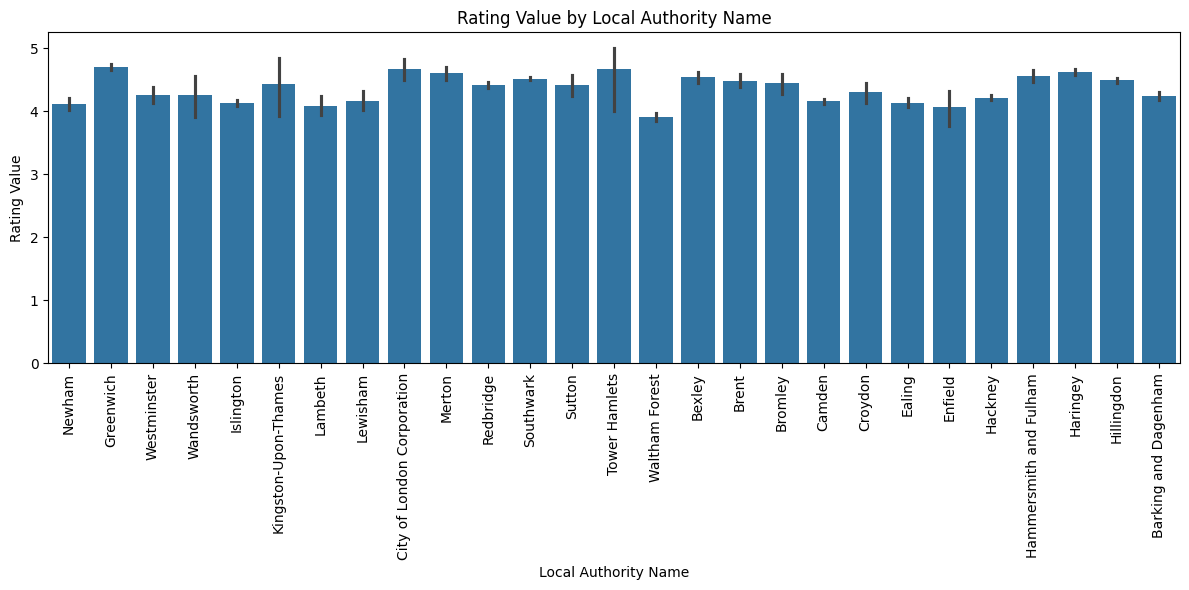

In [97]:

import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot LocalAuthorityName against RatingValue
sns.barplot(data=df, x='LocalAuthorityName', y='RatingValue')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Local Authority Name')
plt.ylabel('Rating Value')
plt.title('Rating Value by Local Authority Name')

# Show the plot
plt.tight_layout()
plt.show()

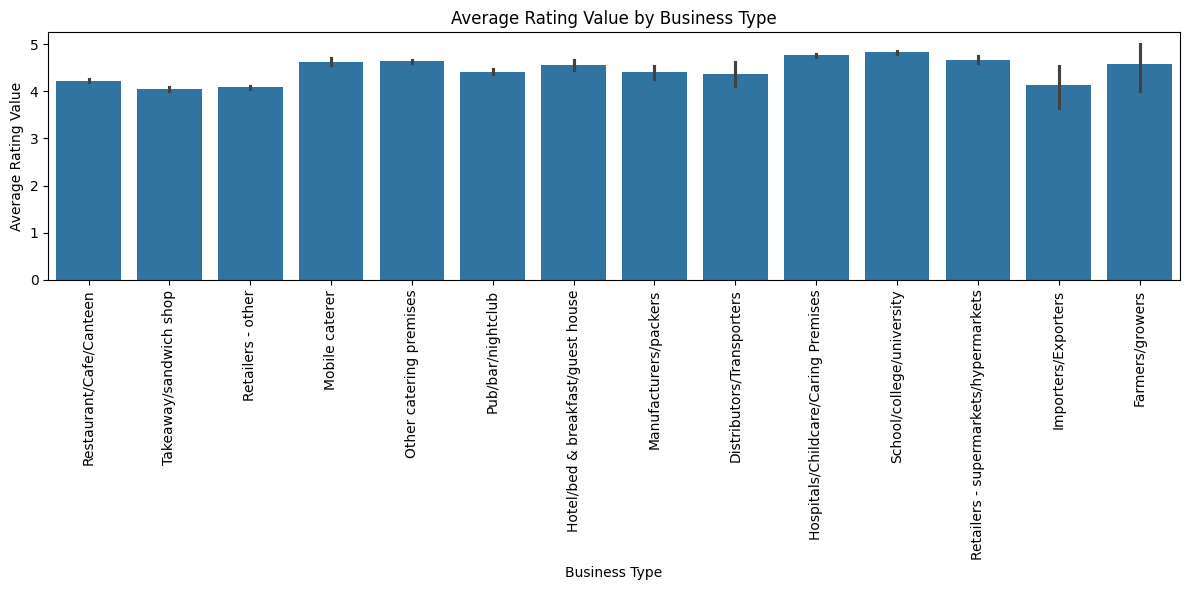

In [98]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Add this line to import NumPy

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot RatingValue against BusinessType
sns.barplot(data=df, x='BusinessType', y='RatingValue', estimator=np.mean)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Business Type')
plt.ylabel('Average Rating Value')
plt.title('Average Rating Value by Business Type')

# Show the plot
plt.tight_layout()
plt.show()

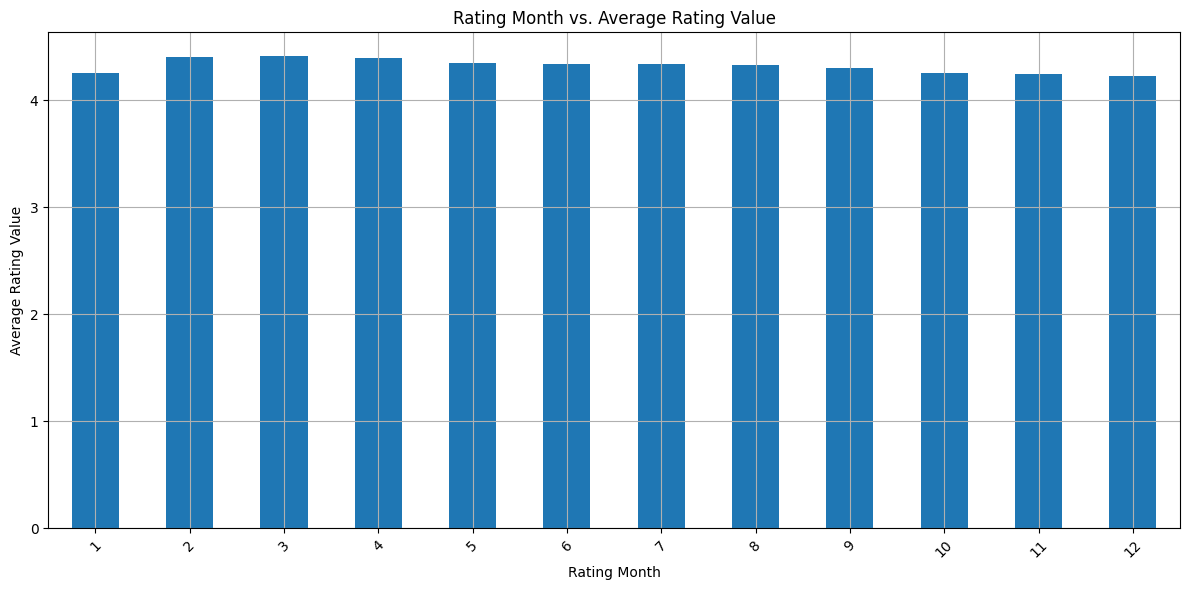

In [99]:

import matplotlib.pyplot as plt

# Calculate average rating value for each month
avg_rating_by_month = df.groupby('RatingMonth')['RatingValue'].mean()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot bar plot
avg_rating_by_month.plot(kind='bar')

# Add labels and title
plt.xlabel('Rating Month')
plt.ylabel('Average Rating Value')
plt.title('Rating Month vs. Average Rating Value')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

The average ratings for establishments across "LocalAuthorityName", "BusinessType", and "RatingMonth" typically fall within the range of 4 to 5. Notably, February and March tend to yield the highest average ratings, while ratings slightly decline from March onwards.

The higher average ratings in February and March could be attributed to potential variations in inspection schedules or assessment criteria during those months. Authorities might prioritize certain types of inspections or establishments during specific periods, leading to fluctuations in the ratings data. Additionally, changes in regulations, enforcement policies, or staff training could also influence the assessment process and subsequent ratings. Further investigation into the inspection practices and protocols during these months could provide additional insights into the observed trends.

# Creating new DataFrame

This dataset presents the distribution of rating values for each BusinessType, showing the count of each rating value within each BusinessType category. The total count column which contains the sum of the total business within the BusinessType was later included.

In [100]:

# Group by BusinessType and RatingValue, then count the occurrences
rating_value_counts = df.groupby(['BusinessType', 'RatingValue']).size().reset_index(name='RatingValueTypeCount')

# Create a new DataFrame with BusinessType, RatingValue, and RatingValueTypeCount
new_df = rating_value_counts.pivot(index='BusinessType', columns='RatingValue', values='RatingValueTypeCount').reset_index()

# Fill missing values with 0
new_df.fillna(0, inplace=True)

# Rename the columns for better clarity
new_df.columns.name = None  # Remove the columns name
new_df.columns = ['BusinessType'] + [f'RatingValue_{rating}' for rating in new_df.columns[1:]]

# Display the new DataFrame
print(new_df)

                             BusinessType  RatingValue_0  RatingValue_1  \
0               Distributors/Transporters            2.0            1.0   
1                         Farmers/growers            0.0            0.0   
2     Hospitals/Childcare/Caring Premises            1.0           12.0   
3       Hotel/bed & breakfast/guest house            0.0            7.0   
4                     Importers/Exporters            1.0            0.0   
5                   Manufacturers/packers            6.0            8.0   
6                          Mobile caterer            0.0            6.0   
7                 Other catering premises            3.0           21.0   
8                       Pub/bar/nightclub            3.0           16.0   
9                 Restaurant/Cafe/Canteen           40.0          198.0   
10                      Retailers - other           49.0          181.0   
11  Retailers - supermarkets/hypermarkets            1.0           10.0   
12              School/co

In [101]:
new_df.head(15)

,BusinessType,RatingValue_0,RatingValue_1,RatingValue_2,RatingValue_3,RatingValue_4,RatingValue_5
0,Distributors/Transporters,2.0,1.0,2.0,7.0,9.0,48.0
1,Farmers/growers,0.0,0.0,0.0,1.0,1.0,5.0
2,Hospitals/Childcare/Caring Premises,1.0,12.0,5.0,32.0,162.0,1040.0
3,Hotel/bed & breakfast/guest house,0.0,7.0,5.0,15.0,56.0,208.0
4,Importers/Exporters,1.0,0.0,2.0,4.0,5.0,16.0
5,Manufacturers/packers,6.0,8.0,7.0,10.0,58.0,182.0
6,Mobile caterer,0.0,6.0,7.0,29.0,70.0,351.0
7,Other catering premises,3.0,21.0,18.0,116.0,410.0,1594.0
8,Pub/bar/nightclub,3.0,16.0,28.0,94.0,213.0,615.0
9,Restaurant/Cafe/Canteen,40.0,198.0,262.0,930.0,1471.0,3698.0


In [102]:

# Group by BusinessType and sum the counts
total_counts = df.groupby('BusinessType').size().reset_index(name='TotalCount')

# Merge total_counts with new_df on BusinessType
new_df = new_df.merge(total_counts, on='BusinessType', how='left')

# Find the index of the "BusinessType" column
business_type_index = new_df.columns.get_loc("BusinessType")

# Find the index of the "RatingValue_0" column
rating_value_0_index = new_df.columns.get_loc("RatingValue_0")

# Move the "TotalCount" column to the desired position
new_df_columns = list(new_df.columns)
total_count_column = new_df_columns.pop(-1)  # Remove the last column
new_df_columns.insert(rating_value_0_index, total_count_column)  # Insert the column at the index of RatingValue_0
new_df = new_df[new_df_columns]  # Reorder the columns

# Display the new DataFrame
new_df.head(15)

,BusinessType,TotalCount,RatingValue_0,RatingValue_1,RatingValue_2,RatingValue_3,RatingValue_4,RatingValue_5
0,Distributors/Transporters,69,2.0,1.0,2.0,7.0,9.0,48.0
1,Farmers/growers,7,0.0,0.0,0.0,1.0,1.0,5.0
2,Hospitals/Childcare/Caring Premises,1252,1.0,12.0,5.0,32.0,162.0,1040.0
3,Hotel/bed & breakfast/guest house,291,0.0,7.0,5.0,15.0,56.0,208.0
4,Importers/Exporters,28,1.0,0.0,2.0,4.0,5.0,16.0
5,Manufacturers/packers,271,6.0,8.0,7.0,10.0,58.0,182.0
6,Mobile caterer,463,0.0,6.0,7.0,29.0,70.0,351.0
7,Other catering premises,2162,3.0,21.0,18.0,116.0,410.0,1594.0
8,Pub/bar/nightclub,969,3.0,16.0,28.0,94.0,213.0,615.0
9,Restaurant/Cafe/Canteen,6599,40.0,198.0,262.0,930.0,1471.0,3698.0


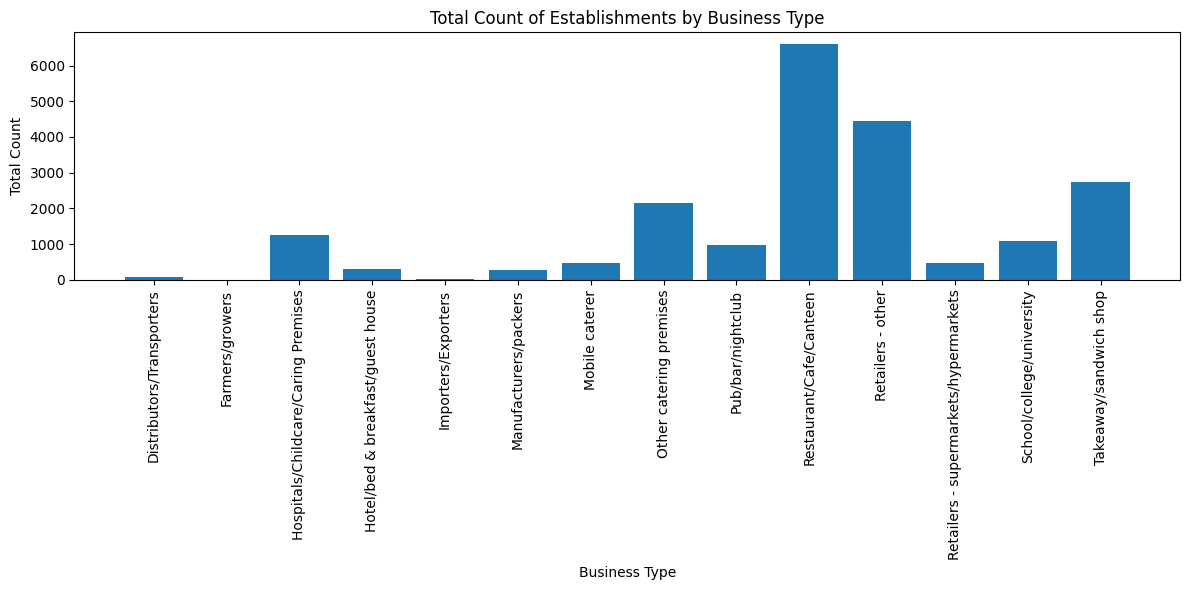

In [103]:

import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot bar plot
plt.bar(new_df['BusinessType'], new_df['TotalCount'])

# Add labels and title
plt.xlabel('Business Type')
plt.ylabel('Total Count')
plt.title('Total Count of Establishments by Business Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

The BusinessType with the highest total count is 'Restaurant/Cafe/Canteen', followed by 'Retailers - other' and 'Takeaway/sandwich shop'. Conversely, the lowest counts are observed in 'Farmers/growers' and 'Importers/Exporters'. This indicates a higher prevalence of establishments categorized as restaurants, cafes, and canteens, as well as retailers and takeaway/sandwich shops, compared to businesses involved in farming or importing/exporting goods.

Given that the dataset is focused on food hygiene ratings, it's logical that establishments involved in food preparation and service, such as restaurants, cafes, and canteens, would comprise a significant portion of the data. These types of establishments are subject to food safety regulations and inspections, making them essential components of the dataset. The higher count of such establishments aligns with the dataset's primary focus on monitoring and assessing food hygiene standards to ensure public health and safety.

# Normalisation

By dividing each rating value by its respective total count, it normalizes the rating values to represent their proportions within each BusinessType category. This normalization allows for a comparison of the relative distribution of rating values across different BusinessType categories, regardless of the total number of establishments within each category.

Finally, the new DataFrame `new_df2` is displayed, showing the first 15 rows of the normalized rating values for each BusinessType category.

In [104]:

# Create new DataFrame new_df2
new_df2 = new_df.copy()

# Divide each rating value by TotalCount
new_df2['RatingValue_0'] = new_df2['RatingValue_0'] / new_df2['TotalCount']
new_df2['RatingValue_1'] = new_df2['RatingValue_1'] / new_df2['TotalCount']
new_df2['RatingValue_2'] = new_df2['RatingValue_2'] / new_df2['TotalCount']
new_df2['RatingValue_3'] = new_df2['RatingValue_3'] / new_df2['TotalCount']
new_df2['RatingValue_4'] = new_df2['RatingValue_4'] / new_df2['TotalCount']
new_df2['RatingValue_5'] = new_df2['RatingValue_5'] / new_df2['TotalCount']

# Display the new DataFrame
new_df2.head(15)

,BusinessType,TotalCount,RatingValue_0,RatingValue_1,RatingValue_2,RatingValue_3,RatingValue_4,RatingValue_5
0,Distributors/Transporters,69,0.028986,0.014493,0.028986,0.101449,0.130435,0.695652
1,Farmers/growers,7,0.000000,0.000000,0.000000,0.142857,0.142857,0.714286
2,Hospitals/Childcare/Caring Premises,1252,0.000799,0.009585,0.003994,0.025559,0.129393,0.830671
3,Hotel/bed & breakfast/guest house,291,0.000000,0.024055,0.017182,0.051546,0.192440,0.714777
4,Importers/Exporters,28,0.035714,0.000000,0.071429,0.142857,0.178571,0.571429
5,Manufacturers/packers,271,0.022140,0.029520,0.025830,0.036900,0.214022,0.671587
6,Mobile caterer,463,0.000000,0.012959,0.015119,0.062635,0.151188,0.758099
7,Other catering premises,2162,0.001388,0.009713,0.008326,0.053654,0.189639,0.737280
8,Pub/bar/nightclub,969,0.003096,0.016512,0.028896,0.097007,0.219814,0.634675
9,Restaurant/Cafe/Canteen,6599,0.006062,0.030005,0.039703,0.140930,0.222913,0.560388


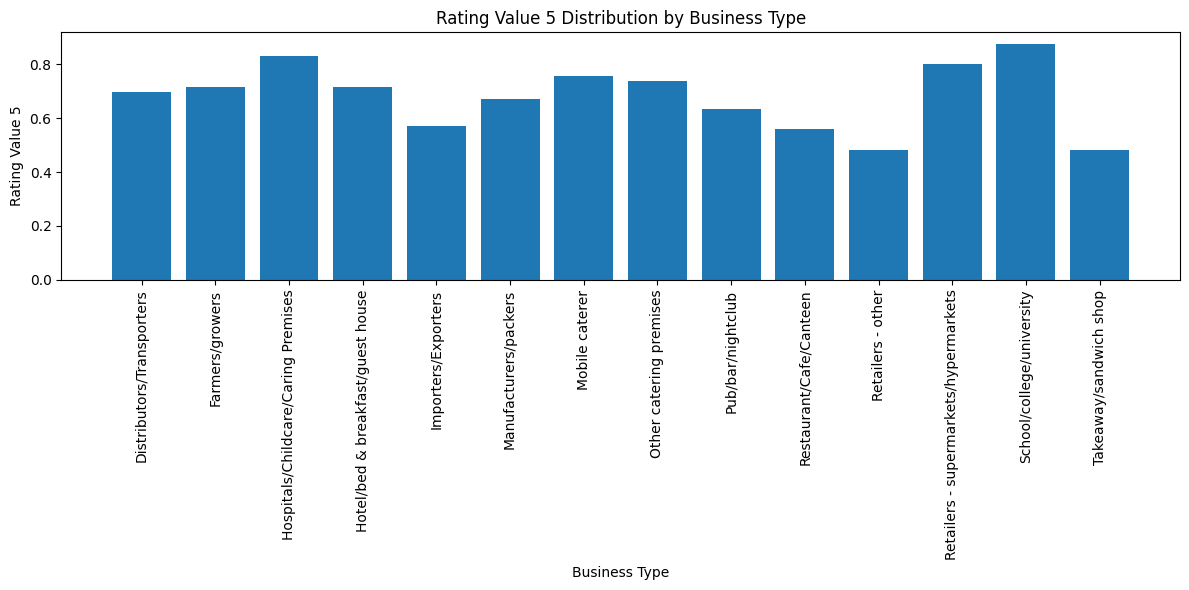

In [105]:

import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot bar plot
plt.bar(new_df2['BusinessType'], new_df2['RatingValue_5'])

# Add labels and title
plt.xlabel('Business Type')
plt.ylabel('Rating Value 5')
plt.title('Rating Value 5 Distribution by Business Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

It seems that establishments categorized as "School/college/university," "Retailers - supermarkets/hypermarkets," and "Hospitals/Childcare/Caring Premises" tend to have the highest distribution of "RatingValue_5," indicating higher compliance with food hygiene standards and potentially exemplary levels of cleanliness and safety. This suggests that these types of establishments prioritize and maintain stringent food hygiene practices, which is crucial for ensuring the health and well-being of their patrons.

It's noteworthy that establishments categorized as "Retailers - other" and "Takeaway/sandwich shop" exhibit lower distribution of "RatingValue_5," indicating potential areas where improvements in food hygiene standards may be needed. This could stem from various factors such as adherence to hygiene protocols, staff training, cleanliness of premises, and handling of food products. Enhancing food safety measures in these establishments could lead to better compliance with hygiene regulations and ultimately improve public health outcomes.

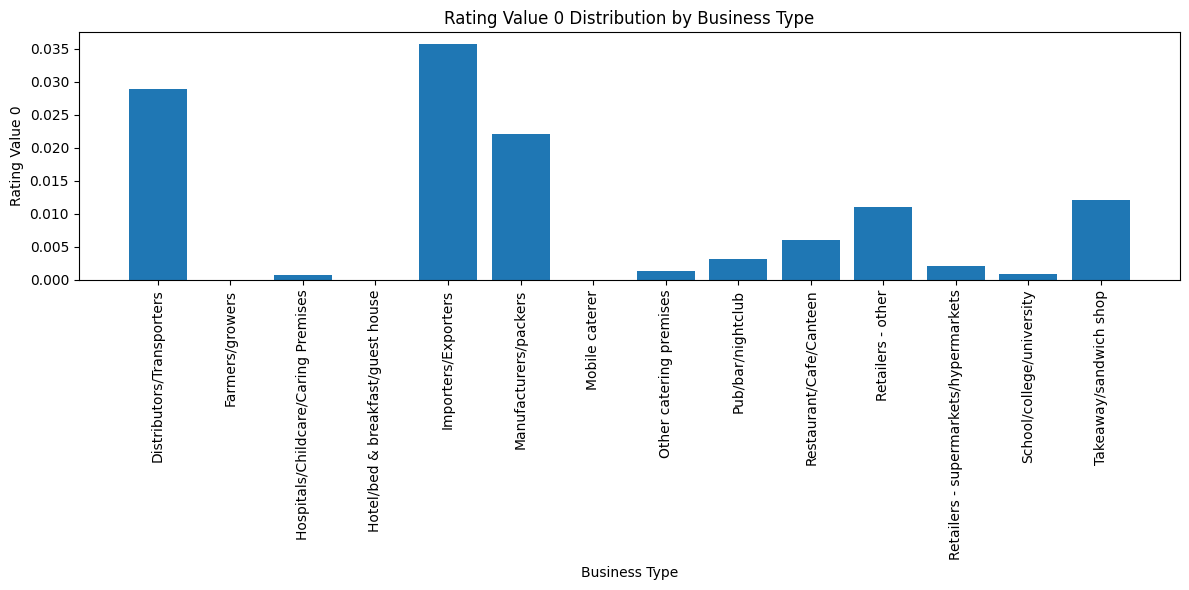

In [106]:

import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot bar plot
plt.bar(new_df2['BusinessType'], new_df2['RatingValue_0'])

# Add labels and title
plt.xlabel('Business Type')
plt.ylabel('Rating Value 0')
plt.title('Rating Value 0 Distribution by Business Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

It seems that "Importers/Exporters," "Manufacturers/packers," and "Distributors/Transporters" have the highest prevalence of poor hygiene or low compliance with food safety standards, as indicated by the distribution of RatingValue_0.

Conversely, establishments in the categories of "Farmers/growers," "Mobile caterer," and "Hotel/bed & breakfast/guest house" have a lower distribution of RatingValue_0, suggesting a relatively lower prevalence of poor hygiene or higher compliance with food safety standards in these sectors.

# Predictive analysis

Using Logistic Regression.

In [107]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define features (X) and target variable (Y)
X = df[['BusinessTypeCode', 'RatingMonth', 'Latitude', 'Longitude']]
Y = df['RatingValueTypeCode']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Predict the target variable on the test set
Y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.814823698728712


# Summary and Conclusion

Based on the analysis conducted on the dataset, we have gained insights into various aspects of food hygiene ratings within the specified region. Here is a summary and conclusion of the project:

1. **Dataset Overview**: The dataset contains information about food hygiene ratings for different businesses, including their types, locations, and ratings.

2. **Exploratory Data Analysis (EDA)**: Through EDA, we explored the distribution of ratings across different business types, geographical locations, and time periods. We also investigated correlations between various features and identified patterns in the data.

3. **Feature Engineering**: We performed feature engineering by encoding categorical variables, extracting additional features like the month from the rating date, and creating new variables such as the rating value type code.

4. **Modeling**: We built a logistic regression model to predict the rating value type code based on features such as business type code, rating month, latitude, and longitude. The model achieved an accuracy of approximately 81.48%.

5. **Conclusion**: Overall, our analysis provides valuable insights into food hygiene ratings in the specified region. We observed that certain business types tend to have higher or lower ratings, and there are geographical and temporal variations in ratings as well. The logistic regression model, although providing a decent level of accuracy, could be further optimized or supplemented with additional modeling techniques to improve predictive performance.

6. **Recommendations**: Based on our findings, stakeholders such as local authorities and businesses can take several actions to improve food hygiene standards. These may include targeted inspections and interventions for businesses with lower ratings, public awareness campaigns, and policies to incentivize compliance with hygiene regulations.

7. **Future Work**: Future iterations of this project could explore more sophisticated modeling techniques, incorporate additional features such as historical ratings and external factors (e.g., weather conditions), and conduct a more in-depth analysis of the factors influencing food hygiene ratings.

In conclusion, this project provides valuable insights into food hygiene ratings and lays the groundwork for further research and interventions to promote food safety and public health.